# Comment expliquer les déserts médicaux?

## 1. Résumé

Nous utilisons et enrichissons des données issues du magazine _Marianne_ pour expliquer l'existence de déserts médicaux en Frane métropoloitqine. Dans [cette enquête d'octobre 2021](https://www.marianne.net/societe/sante/comment-marianne-a-enquete-sur-les-deserts-medicaux), les journalistes ont tenté de prendre un rendez-vous médical dans un grand nombre de villes de France chez différents spécialistes (généraliste, gynécologue, dentiste, ophtalmologue, pédiatre, dermatologue) et ont noté le temps d'attente pour obtenir un tel rendez-vous.

![](img/im1.jpg)

Nous transformons ces données (diffusées au format PDF) pour pouvoir les exploiter. Puis nous collectons des données susceptibles d'expliquer ce temps d'attente:

1. soit directement par attractivité pour les médecins (ex: météo)
2. soit indirectement via une patientèle plus nombreuse (ex: densité de population, personnes âgées)

La collecte des données occupe la section 2 de ce rapport et mobilise notamment la reconnaissance de caractère (OCR) et l'extraction de données de différents sites Internet (INSEEE, https://www.villesetvillagesouilfaitbonvivre.com/ et Wikipédia). Au final nous collectons les variables suivantes:

- densité
- pluviométrie
- ensoleillement
- température
- taux de plus de 60 ans
- revenu par unité de consommation médian
- classement sur https://www.villesetvillagesouilfaitbonvivre.com/
- nombre de nuités en hôtel
- nombre de nuites en camping

Pour finir, à partir des <COMPLÉTER> territoires étudiés par _Marianne_ nous obtenons un jeu de données de <COMPLÉTER> communes avec toutes les variables collectées. Le détail est ci-dessous:

<TABLEAU DU % DE VALEURS MANQUANTES PAR VARIABLE>

Ensuite, lors d'une exploration des données (section 3), nous trouvons pas d'interdépendance entre les temps d'attente chez les différents spécialistes : ce ne sont pas les mêmes territoires qui manquent de pédiatres et ceux qui manquent de généralistes ou de dermatologues. Ces mêmes temps d'attente ne suivent pas non plus une distribution spatiale claire : des villes proches peuvent avoir des temps d'attente largement différents. Enfin, nous étudions la dépendance entre les temps d'attente et les variables explicatives que nous avons collectées.

Notre principal résultat est reproduit ci-dessous. Il s'agit d'une part, de l'importance de nos variables pour expliquer le temps d'attente chez un généraliste. D'autre part d'une carte du temps d'attente chez le généraliste résiduel. Notons bien que cette analyse, très préliminaire, ne peut en aucun cas être interprété de façon causale et une discussion du caractère exogène des variables explicatives sort largement du cadre de ce travail. Et notons également que l'exemple du généraliste est pris pour ne pas surcharger l'analyse, mais que l'exercice pourrait tout à fait être répété pour les 5 autres spécialités.

<BarContainer object of 10 artists>

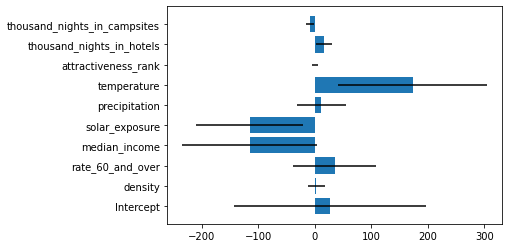

In [528]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as pp

waiting = pd.read_csv("data/2-6-cancatenated-data.csv", index_col=0) # cf. section 2-5 for origin

variables = [
    'GP',
    "density", 'rate_60_and_over',  "median_income",
    'solar_exposure', 'precipitation', 'temperature',
    "attractiveness_rank",
    'thousand_nights_in_hotels', 'thousand_nights_in_campsites'
]

waiting_complete = waiting[variables].copy().dropna()

formula = str( variables[0] ) + "~" + "+".join(variables[1:])
# print(formula)

results = smf.ols( # cf. section 4-1 for discussion
    formula,
    data = waiting_complete
).fit()

waiting_complete['resid'] = results.resid
means = np.concatenate(( [1], waiting_complete[variables[1:]].mean()))
ci = results.conf_int()
relative_width = ci.max(axis=1)-ci.mean(axis=1)

# TODO: add confidence intervals
pp.barh(
    y=range(len(importance)),
    xerr  = relative_width*means, # ci.mul(means, axis="rows").to_numpy().transpose(),
    width = results.params * means,
    tick_label = results.params.index
)

In [457]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GP   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2.259
Date:                Thu, 06 Jan 2022   Prob (F-statistic):             0.0288
Time:                        13:57:41   Log-Likelihood:                -376.01
No. Observations:                  75   AIC:                             772.0
Df Residuals:                      65   BIC:                             795.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       26.9996     85.051      0.317      0.752    -142.858     196.858
density                          0.0010      0.004      0.277      0.783      -0.006       0.008
rate_60_and_over                 1.2656      1.338      0.946      0.348      -1.406       3.937
median_income                   -0.0058      0.003     -1.929      0.058      -0.012       0.000
solar_exposure                  -0.0579      0.024     -2.445      0.017      -0.105      -0.011
precipitation                    0.0139      0.027      0.510      0.612      -0.041       0.068
temperature                     14.1896      5.408      2.624      0.011       3.388      24.991
attractiveness_rank             -0.0010      0.007     -0.145      0.885      -0.015       0.013
thousand_nights_in_hotels        0.0089      0.004      2.241      0.028       0.001       0.017
thousand_nights_in_campsites    -0.0056      0.002     -2.411      0.019      -0.010      -0.001
==============================================================================
Omnibus:                       25.888   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.131
Skew:                           1.416   Prob(JB):                     3.18e-09
Kurtosis:                       5.121   Cond. No.                     3.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

\<INTERPRÉTATION\>

Maintenant, nous pouvons également regarder si, une fois contrôlés par les variables explicatives, les temps d'attente présentent des motifs géographiques. (Ce qui suggérerait des phénomènes socio-spatiaux additionnels pouvant expliquer les déserts médicaux.) À cette fin, **nous cartographions les résidus** sur une carte **interactive**, surlaquelle il est possible d'explorer les données :

In [530]:
from pathlib import Path
from math import sqrt
from matplotlib.colors import rgb2hex

# read shapefiles
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes = communes.rename(columns={'nom': 'City'})

# bring back variables in the game
waiting_complete_2 = pd.merge(waiting, waiting_complete, how='right')
# merge 
waiting_complete_2 = pd.merge(communes, waiting_complete_2, how='inner', on='City')
# here we lose data from both datasets here, cf. section 7

# collect centroids of shapes
waiting_complete_2['lon'] = waiting_complete_2.geometry.centroid.x
waiting_complete_2['lat'] = waiting_complete_2.geometry.centroid.y

# color maps go from [0,1] to RGB space
# hence we normalise the residuals from 0 to 1
residuals = (waiting_complete_2['resid']-min(waiting_complete_2['resid']))
residuals = residuals/max(residuals)
residuals
# this operation does not necessary maps 0 to 0.5 as expected
# see section 7
colors = plt.cm.bwr(residuals)

# now let's draw the map
Path("leaflet").mkdir(parents=True, exist_ok=True) # in order to store local files
m = folium.Map(tiles='Stamen Toner')

# add circles one by one
for i in range(0,len(waiting_complete_2)):
    folium.Circle(
        [waiting_complete_2.iloc[i]['lat'], waiting_complete_2.iloc[i]['lon']],
        radius = 50*sqrt(waiting_complete_2.iloc[i]['population']),
        popup = str(waiting_complete_2.iloc[i]['City'])+"<br> Résidu: "+str(waiting_complete_2.iloc[i]['resid']),
        color = rgb2hex(colors[i]),
        weight = 1,
        fill_color = rgb2hex(colors[i]),
        fill = True,
        fill_opacity = 0.6
    ).add_to(m)

m.fit_bounds([[42.26,-4], [51,8.388]])
m

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  app.launch_new_instance()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



Ici, la dimensions spatiale des résidus n'est pas évidente. **Marseille est sur-dotée en généralistes** (temps d'attente plus courts de 60j par rapport à la moyenne _toutes choses égales par ailleurs_) **alors que Nice est sous-dotée** (temps d'attente plus longs de 124j). Étant donnée la fragilité de la régression utilisée en première partie, nous appelons à la précaution avant d'interpréter ces résultats.

Enfin:

- la section 5 défend scientificité et la reproducibilité de notre démarche ;
- la section 6 défend la lisibilité de notre code ;
- la section 7 propose quelques axes d'amélioration

## 2. Données

Dans cette partie nous détaillons une par une les sources de données et les difficultés afférentes. Une des grosses difficulté est, comme souvent, de toruver comment joindre des données de sources différentes. Nous basons l'essentiel de cetravail de jointure sur le code INSEE (récupéré sur Wikipédia) et sur le nom des communes (ce qui a nécessité beaucoup d'intervention manuelle). La discussion sur la jointure est reportée en dernière section de cette partie.

### 2.1 Conversion par OCR des temps d'attentes de spécialités médicales depuis le PDF d'un article du journal _Marianne_

Les données que nous cherchons à comprendre sont issues d'un article de  _Mariane_. Elles se présentent sous la forme d'un tableau qui montre le temps d'attente pour obtenir un rendez vous chez différentes spécialistes dans chaque préfecture et sous-préfecture. 

Ce tableaux cependant n'est récupérable qu'en image comme celle-ci :
![Alt text](img/im1.jpg "Image données de Mariane")
L'enjeu de cette extraction de donnée sera donc de convertir une image de tableau en fichier exploitable pour le traitement des données (CSV ici).

Pour lire le texte sur un fichier image, on utilise tesseract, un logiciel de reconnaissance optique de caractère facilement utilisable depuis python.

In [230]:
'''/!\ L'execution peut prendre 1 minute'''

# on commence par installer tesseract
!sudo apt update
!sudo apt install -y ffmpeg
!sudo apt install -y tesseract-ocr
!pip install pytesseract

# et on importe les modules nécessaires pour le traitement
import re
from PIL import Image
from pytesseract import pytesseract
from tqdm import tqdm

Get:1 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:2 http://deb.debian.org/debian buster InRelease [122 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [308 kB]
Get:5 http://deb.debian.org/debian buster/main amd64 Packages [7,906 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [15.2 kB]
Fetched 8,468 kB in 2s (4,407 kB/s)



5 packages can be upgraded. Run 'apt list --upgradable' to see them.



The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libasound2
  libasound2-data libass9 libasyncns0 libavc1394-0 libavcodec58 libavdevice58
  libavfilter7 libavformat58 libavresample4 libavutil56 libbdplus0 libbluray2
  libbs2b0 libcaca0 libcap2 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libchromaprint1 libcodec2-0.8.1 libcrystalhd3 libdc1394-22 libdrm-amdgpu1
  libd

Observons le travail de Tesseract sur l'image précedante :

In [ ]:
img=Image.open("img/im1.jpg")
text = pytesseract.image_to_string(img.convert("L")) 
#on converti l'image en noir et blanc avant de la traiter, l'OCR fonctionne mieux
print(text)

NOTRE PALMARES EXCLUSIF

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

8 2|3
S = 2/38
5 Territoire 2 = 2 = 2 £
2 Z/e/2/2/2/8
é 8|8|8|e|é/2@
En nombre de jours
Moyenne nationale | 98 | 140 | 21 | 101 | 158 | 74
232° |Abbeville 81 | 233 | 14 | 107 | 154 | 181
263° |Agen 162 | 239 | 53 | 95 | 260] 65
1" _|Aix-en-Provence 32| 53 | 3 | 8 | 30 | 20
4° |Ajaccio 11 | 90 | 7 | 19 | 53 | 66
276° Albertville 237 | 154 | 9 | 174 | 222 | 234
269° {Albi 185 | 142 | 7 | 356 | 132 | 164
117° |Alengon 147 | 87 | 15 | 89 | 143] 65
175° |Alés 48 | 199| 8 | 77 | 196 | 123
230° |Altkirch 144 (5 | 117 | 188 [aie
218° |Ambert 62 a 6 ay 190 it
12° [Amiens 21 | 90 | 5 | 93 | 33 | 46
277" |Ancenis-St-Geréon | 163 | 284 | 13 [Eat 101 [Ee
155° |Angers 109 | 145 | 68 | 86 | 79 | 89
65° |Angouléme 118 | 146 | 5 | 76 | 108] 73
32° |Annecy 56 | 193} 8 | 57 | 30 | 33
303° |Apt 203 | 141 | 5 | 69 | 226

On obtient donc une chaine de caractère contenant beaucoup de lignes vides ou inutiles au début. Les données intéressantes arrivent après la ligne qui montre les **moyennes nationales**.

Ensuites les lignes sont presque toutes similaires : les données sont séparées par un séparateur vertical | ou parfois par un autre caractère spécial ressemblant (un slash, un crochet, etc.). La première donnée est le classement suivit du symbole degré ou d'un symbole ressemblant (guillemet, etc.), puis vient le nom de la ville et enfin les données de temps d'attente.

La lecture est assez efficace même si les valeurs absentes notées _PRdv_ dans l'image dont mal retranscrites, il manque parfois des valeurs ou le nom des villes est mal orthographié. Nous allons donc pouvoir traiter la quasi totalité des données automatiquement et nous compléterons les données manquantes.

Etudions l'exemple de la première image :

In [ ]:
fichierCSV = "" # le fichier de sortie dans lequel les données seront au format exploitable
erreurs = [] # il contiendra les villes pour lesquelles le traitement n'a pas fonctionner

sep = '[\\\|\[\]\(\)\{\}/° "*:¢_]' # une expression régulière de tous les caractères qui peuvent séparer deux données lues dans un ligne 

liste = text.split("\n")[:-1] # on sépare le texte ligne par ligne

bon = False #ce booleen permet de se débarasser des lignes du bébut : il devient True qu'après avoir dépassé la ligne de la moyenne nationale

for l in liste:
    if bon and l != ' ' and l != '': # traiter les lignes après la moyenne nationale et qui ne sont pas vides
        
        tmp = [] # contiendra chacune des donnée de la ligne
        villeAArticle = False # si le nom de la ville contient un espace elle est traitée différemment
        
        # remplir tmp
        for i in re.split(sep,l): 
            if villeAArticle and i!='':
                tmp[-1]+= " "+ i
                villeAArticle=False
            else:
                if i == "Le" or i =="La" or i == "Les" or i == "Vire":
                    villeAArticle = True
                if i != "":
                    tmp.append(i)

        # convertir tmp en ligne du fichier CSV
        fichierCSV += "\n" + tmp[0] + "," + tmp[1]
        for e in range(2,8):
            try:
                if tmp[e].isdigit():
                    fichierCSV += ","+tmp[e]
                else:
                    fichierCSV += ",NA"
            
            except: # exception si tmp contient moins de 8 éléments
                fichierCSV += ",NA"
        
        # Il y a eu erreur de lecture si le fichier ne contient pas 8 éléments
        if len(tmp)!=8 :
            erreurs.append(tmp[1])

    else :
        if 'Moyenne nationale' in l:
            bon = True

print("Il y a eu {} erreurs.".format(len(erreurs)))
print("\nLes premières lignes du fichier CSV :")
print(fichierCSV[:196])


Il y a eu 8 erreurs.

Les premières lignes du fichier CSV :

232,Abbeville,81,233,14,107,154,181
263,Agen,162,239,53,95,260,65
1,Aix-en-Provence,32,53,3,8,30,20
4,Ajaccio,11,90,7,19,53,66
276,Albertville,237,154,9,174,222,234
269,Albi,185,142,7,356,132,164


Pour traiter toutes les images, on a juste à faire en boucle ce code pour les sept images.

In [232]:
'''/!\ L'execution peut prendre 2 minutes'''

# on entre le nom des colonnes du fichier CSV 
fichierCSV = "Rang sur 314,Territoire,Dentiste,Dermatologue,Généraliste,Gynécologue,Ophtalmologue,Pédiatre"
erreurs = []

for i in tqdm(range(7)):
    img=Image.open("img/im"+str(i+1)+".jpg")
    text = pytesseract.image_to_string(img.convert("L"))

    
    liste = text.split("\n")[:-1]
    sep = '[\\\|\[\]\(\)\{\}/° "*:¢_]'
    bon = False

    for l in liste:
        if bon and l != ' ' and l != '':
            tmp = []
            villeAArticle = False
            for i in re.split(sep,l):
                if villeAArticle and i!='':
                    tmp[-1]+= " "+ i
                    villeAArticle=False
                else:
                    if i == "Le" or i =="La" or i == "Les" or i == "Vire":
                        villeAArticle = True
                    if i != "":
                        tmp.append(i)

            fichierCSV += "\n" + tmp[0] + "," + tmp[1]
            for e in range(2,8):
                try:
                    if tmp[e].isdigit():
                        fichierCSV += ","+tmp[e]
                    else:
                        fichierCSV += ",NA"
                except:
                    fichierCSV += ",NA"
            if len(tmp)!=8 :
                erreurs.append(tmp[1])

        else :
            if 'Moyenne nationale' in l:
                bon = True

# Enregistrer les données (on ne le fait pas ici car elles sont déjà enregistrées et pré-traitées)

fichier = open("data/2-1-waiting-time-temp.csv","w")
fichier.write(fichierCSV)
fichier.close()

100%|██████████| 7/7 [01:17<00:00, 11.12s/it]


Il reste ensuite quelques villes listées dans la liste _erreurs_ pour lesquelles la lecture n'a pas fonctionné. Souvent seulement une donnée de la ligne n'a pas été lue. On les a modifiées à la main dans le fichier CSV.

### 2.2 Normalisation via Wikipédia

Pour permettre de travailler avec les autres données, on associe à chaque ville étudiée dans Mariane à son code INSEE. 

Pour se faire on crée un DataFrame qui lie chaque ville à son code INSEE à l'aide de la page wikipedia des sous-préfectures et des préfectures.

#### Les sous-préfectures

La page wikipédia des sous préfectures présente un tableau qui lie le nom des sous-préfectures à leur numéro INSEE.
![Alt text](img/table_sous_pref.PNG "Tableau des sous préfectures")

In [239]:
import urllib
from bs4 import BeautifulSoup
import pandas
from urllib import request
from tqdm import tqdm
import pandas as pd


url = "https://fr.wikipedia.org/wiki/Liste_des_sous-pr%C3%A9fectures_de_France"
request_text = request.urlopen(url).read()
page = BeautifulSoup(request_text, "lxml")

lignes = page.find('table').find_all('tr')

dico = dict()

for ligne in lignes[1:] :
    nouveau_dep = ligne.find('th')!=None
    cols = ligne.find_all('td')

    if nouveau_dep:
        if cols[2].text.strip() != '' :
            dico[cols[2].text.strip()]=cols[1].text.strip()
    else :
        dico[cols[1].text.strip()]=cols[0].text.strip()

#### Les préfectures

Malheureusement la page wikipedia des préfectures liste seulement le nom des villes mais pas leur code INSEE. Il faut donc se rendre sur la page wikipedia de chaque ville pour trouver son code INSEE dans le tableau d'entête.

In [241]:
'''/!\ L'execution peut prendre 2 minutes'''

url = "https://fr.wikipedia.org/wiki/Liste_des_pr%C3%A9fectures_de_France"

request_text = request.urlopen(url).read()
page = BeautifulSoup(request_text, "lxml")

lignes = page.find('table').find_all('tr')

for ligne in tqdm(lignes[1:97]):
    # on récupère le nom de la ville
    nom = ligne.find_all('td')[1].text.strip()

    # on récupère le lien vers la page wikipedia de la ville
    lien = "https://fr.wikipedia.org" + ligne.find_all("a")[1].get('href')
    page_pref = BeautifulSoup(request.urlopen(lien).read(), "lxml")

    infos = page_pref.find('table').find_all('tr')
    i=0

    try :
        test = infos[i].find('th').text.strip()
    except :
        test = None
    while test != "Code commune":
        i+=1
        try :
            test = infos[i].find('th').text.strip()
        except :
            test = None
    num = infos[i].find('td').text.strip() # on récupère le numéro INSEE

    num = num.split(" ")[0] # Dans le cas où il y a plusieurs numéros INSEE on prend que le premier
    dico[nom]=num

100%|██████████| 96/96 [01:40<00:00,  1.05s/it]


#### Ajustements

Mariane a ajouté deux communes en plus des préfectures et sous préfectures, on les rajoute et Paris est nommée 'Paris (C)', on donc le nom.

In [242]:
# Les deux villes qui ne sont pas des préfectures
dico['Ancenis-St-Géréon']='44003'
dico['Sainte-Menehould']='51507'

dico['Paris'] = dico.pop('Paris (C)')

#### Ajout du code INSEE aux données de temps d'attente

On ajoute enfin le code INSEE aux données de temps d'attente. Pour cela on compare le nom des villes du dictionnaire que l'on vient de créer aux noms des villes lues dans les tableaux de Mariane. Il y a quelques erreurs dans la lecture du nom des villes notamment des erreurs d'accents. On utilise donc un module qui supprime les accents pour comparer les noms.

Il reste encore quelques erreurs rares par exemple des _ô_ lus commes des _6_ ou des _l_ lus comme des _i_. On enregistre ces erreurs dans une variable et on modifie à la main ces quelques erreurs de lectures.

In [386]:
!pip install unidecode
from unidecode import unidecode

fichier = open("data/2-1-waiting-time-temp.csv", "r")
doc = fichier.read()
fichier.close()


dico1 = dict() # le dictionnaire sans accents 
for i in dico :
    dico1[unidecode(i)]=dico[i]

# le dictionnaire inversé qui associe à un numéro INSEE une ville (bien orthographiée)
dico_inv = {v:k for k,v in dico.items()} 

tab=[el.split(",") for el in doc.split("\n")[1:]]

# le fichier qui contiendra la liste des temps d'attente avec le numero INSEE
nouveau_CSV="insee_code,City,Dentist,Dermatologist,GP,Gynécologist,Ophtalmologist,Pédiatrician,Rank"
erreurs=[]

for el in tab:
    try : # si la lecture de l'image a bien fonctinné, il arrive à associer à la ville un numéro INSEE
        num = dico1[unidecode(el[1])]
        nouveau_CSV += "\n"+num + "," + dico_inv[num]+"," + el[2]+","+el[3]+","+el[4]+","+el[5]+","+el[6]+","+el[7]+","+el[0]

    except: # sinon on le fera à la main
        erreurs.append(el[1])

#print(erreurs) # il n'y a que 13 erreurs, on peut les traiter à la main

fichier = open("data/2-1-waiting-time.csv", "w")
fichier.write(nouveau_CSV)
fichier.close()

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


On enregistre aussi le dictionnaire qui lie les villes et les codes INSEE au format CSV car il sera aussi utiles pour la suite.

In [176]:
municipalitie = pd.DataFrame(dico_inv, index = ['name']).T.sort_values(by=['name'])
fichier = open("data/2-0-municipalities2.csv",'w')
fichier.write('insee_code'+municipalitie.to_csv())
fichier.close()


### 2.3 Téléchargement des données socio-démographiques depuis insee.fr


Importation des identifiants des villes

In [165]:
import pandas as pd

municipalities = pd.read_csv(
    'data/2-0-municipalities.csv',
    index_col=0
)

municipalities

name
insee_code                    
80001                Abbeville
47001                     Agen
13001          Aix-en-Provence
2A004                  Ajaccio
73011              Albertville
...                        ...
47323       Villeneuve-sur-Lot
14762           Vire Normandie
51649        Vitry-le-François
08490                 Vouziers
43268               Yssingeaux

[314 rows x 1 columns]

#### Importation depuis [insee.fr](https://insee.fr)

Les pages du site qui donnent les statistiques commune par commune ont une URL standardisée de la forme:

`https://www.insee.fr/fr/statistiques/2011101?geo=COM-...`

... où `...` représente le code INSEE de la commune.

Par ailleurs, ces pages sont structurées de façon identique, et il est donc possible via la bibliothèque `beautifulsoup` d'y aller piocher les informations utiles.

Certains communes cependant, typiquement des communes de l'outre-mer, ont des pages avec des informations structuréee différemment. Avec une **gestion des erreurs** du type `try -> except`, nous testons donc si l'information est présente sur le site, et renvoyons une valeur manquante le cas échéant.

La fonction ci-dessous retourne les données pour **_une_** ville:

In [110]:
from bs4 import BeautifulSoup
from urllib.request import urlopen 

def read_insee(insee_code):
    
    url = "https://www.insee.fr/fr/statistiques/2011101?"+\
        "geo=COM-"+insee_code

    with urlopen(url) as page:

        parsed_page = BeautifulSoup(page)

        # Population et densité

        try:
            pop_table_rows = parsed_page.find(id="produit-tableau-POP_T1").find_all('tr')
            population = float(pop_table_rows[1].find_all('td')[-1].text.replace('\xa0', ''))
            densite = float(pop_table_rows[2].find_all('td')[-1].text.replace('\xa0', '').replace(",", "."))
            print(' ✅ popu', end="")
        except AttributeError :
            # catches cases where the table is missing
            print(' ❌ popu', end="")
            population = pd.NA
            densite = pd.NA
        
        # Part des 60 à 74 ans et des 75 ans ou plus

        try:
            age_table_rows = parsed_page.find(id="produit-tableau-POP_T0").find_all('tr')
            rate_60_74       = age_table_rows[6].find_all('td')[5].text.replace(",", ".")
            rate_75_and_over = age_table_rows[7].find_all('td')[5].text.replace(",", ".")
            rate_60_and_over = float(rate_60_74 ) + float( rate_75_and_over )
            print(' ✅ rate', end="")
        except AttributeError :
            # catches cases where the table is missing
            print(' ❌ rate', end="")
            rate_60_and_over = pd.NA


        # Médiane du revenu disponible par unité de consommation (en euros)
        
        try:
            income_table_rows = parsed_page.find(id="produit-tableau-REV_T1").find_all('tr')
            median_income = income_table_rows[3].find('td').text.replace('\xa0', '')
            median_income = float( median_income )
            print(' ✅ inco', end="")
        except AttributeError :
            # catches cases where the table is missing
            print(' ❌ inco', end="")
            median_income = pd.NA

    return({
        "population" : population,
        "density" : densite,
        "rate_60_and_over" : rate_60_and_over,
        "median_income" : median_income
    })

Démonstration sur la ville de Poitiers:

In [112]:
poitiers = municipalities[ municipalities["name"]=="Poitiers" ]
insee_code_poitiers = poitiers.index[0]
read_insee(insee_code_poitiers)

 ✅ popu ✅ rate ✅ inco

{'population': 88665.0,
 'densite': 2105.6,
 'rate_60_and_over': 20.1,
 'median_income': 19000.0}

Ensuite il ne reste plus qu'à exécuter la fonction sur l'ensemble des communes ...

In [175]:
# WARNING !!! TAKES ~1 HOUR TO RUN !!!
socio_economic = []
skip = True
for insee_code, values in municipalities.iterrows() :
    if values[0]=="Thionville" : # in case an error breaks the retreival at some moment
        skip = False
    if skip :
        continue
    print('📍 '+ values[0].ljust(32), end='')
    socio_economic.append( read_insee(insee_code) )
    print("")

📍 Thionville                       ✅ popu ✅ rate ✅ inco
📍 Thonon-les-Bains                 ✅ popu ✅ rate ✅ inco
📍 Torcy                            ✅ popu ✅ rate ✅ inco
📍 Toul                             ✅ popu ✅ rate ✅ inco
📍 Toulon                           ✅ popu ✅ rate ✅ inco
📍 Toulouse                         ✅ popu ✅ rate ✅ inco
📍 Tournon-sur-Rhône                ✅ popu ✅ rate ✅ inco
📍 Tours                            ✅ popu ✅ rate ✅ inco
📍 Troyes                           ✅ popu ✅ rate ✅ inco
📍 Tulle                            ✅ popu ✅ rate ✅ inco
📍 Ussel                            ✅ popu ✅ rate ✅ inco
📍 Val de Briey                     ✅ popu ✅ rate ✅ inco
📍 Valence                          ✅ popu ✅ rate ✅ inco
📍 Valenciennes                     ✅ popu ✅ rate ✅ inco
📍 Vannes                           ✅ popu ✅ rate ✅ inco
📍 Vendôme                          ✅ popu ✅ rate ✅ inco
📍 Verdun                           ✅ popu ✅ rate ✅ inco
📍 Versailles                       ✅ popu ✅ rate

... puis à convertir le résultat en tableau de données :

In [192]:
socio_economic_df = pd.DataFrame(socio_economic)
# in case of interruption
# temp1 = pd.read_csv('data/2-2-socio-economic-from-insee-temp.csv')
# temp2 = pd.read_csv('data/2-2-socio-economic-from-insee-temp-2.csv')
# temp3 = pd.read_csv('data/2-2-socio-economic-from-insee-temp-3.csv')
# temp4 = pd.read_csv('data/2-2-socio-economic-from-insee-temp-4.csv')
# socio_economic_df = pd.concat([temp1, temp2, temp3, temp4]).drop("Unnamed: 0", axis=1)
socio_economic_df.set_index(municipalities.index, inplace=True)
socio_economic_df.to_csv("data/2-2-socio-economic-from-insee.csv")

### Vérification

In [ ]:
import pandas as pd
socio_economic_df = pd.read_csv("data/2-2-socio-economic-from-insee.csv", index_col=0)
socio_economic_df

rate_60_and_over  median_income
insee_code                                 
80001                   29.8        17910.0
47001                   24.1        18180.0
13001                   24.4        24340.0
2A004                   28.6        21480.0
73011                   28.3        19740.0
...                      ...            ...
47323                   36.7        18420.0
14762                   34.7        20430.0
51649                   30.6        16650.0
08490                   35.9        19440.0
43268                   28.8        21340.0

[314 rows x 2 columns]


### 2.3 Extraction des données météorologiques de Wikipédia


### Importation des identifiants des villes

In [ ]:
import pandas as pd

municipalities = pd.read_csv(
    'data/2-0-municipalities.csv',
    index_col=0
)

municipalities

name
insee_code                    
80001                Abbeville
47001                     Agen
13001          Aix-en-Provence
2A004                  Ajaccio
73011              Albertville
...                        ...
47323       Villeneuve-sur-Lot
14762           Vire Normandie
51649        Vitry-le-François
08490                 Vouziers
43268               Yssingeaux

[314 rows x 1 columns]

### Recherche de données météorologiques

La plupart des applications météorologiques avec API trouvées par une rechercher par mot-clé sont malheureusement payantes. Nous décidons d'avoir alors recours à Wikipedia, au risque de données incomplètes.

La plupart des article de ville sur Wikipédia possèdent en effet une section "climat" qui possède généralement un tableau de variables climatiques moyennes mensuelles / annuelles, notamment la température, les précipitations et . Ce tableau est souvent structuré de la même façon, mais pas systématiquement.

### Extraction proprement dite

La fonction suivante récupère les informations dans les cas les plus classiques.




In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import quote
import pandas as pd
def read_wiki(city_name, verbose=0):

    # default result with everything NA
    result = {
        "solar_exposure" : pd.NA,
        "precipitation" :  pd.NA,
        "temperature" :    pd.NA,
    }
    
    url = "https://fr.wikipedia.org/wiki/"+quote(city_name)

    with urlopen(url) as page:

        if verbose >= 1:
            print('✅ URL valid', end="")

        parsed_page = BeautifulSoup(page)

        # the id climate is hosted in a span inside a h3 title

        local_climate_title = parsed_page.find(id="Climat")

        if local_climate_title is None :
            print(' 😵 no #climate tag found')
            return(result)

        if verbose >= 1:
            print(' ✅ #climate tag found', end="")
        local_climate_title = local_climate_title.parent

        # the table with temperatures comes after this title,
        # at the same level as the climate title in the page body
        # but BEFORE the next h3 tag

        local_climate_table = None

        for tag in local_climate_title.next_siblings:

            if tag.name=='h3' :

                # if we found an other h3, it means the section has ended
                # without finding any tables, and we skip the rest

                print(' 😵 no table found')
                return(result)   

            if tag.name=='table' :

                local_climate_table = tag
                if verbose >= 1:
                    print(' ✅ a table has been found', end='')
                
                local_climate_data = pd.read_html(
                    str(local_climate_table),
                    decimal=',', thousands=' ',
                    index_col = 0
                )[0]
                # pd.read_html() returns a list of tables,
                # here containing only one table
                # (this explains the [0] at the end)
                
                if 'année' not in local_climate_data.columns:
                    
                    if verbose >= 1:
                        print(' ... but it does not contain a column called "année"', end='')
                    
                    continue
                
                else:

                    if 'Précipitations (mm)' in local_climate_data.index:
                        print(' ✅ prec', end="")
                        prec = local_climate_data.loc['Précipitations (mm)','année']
                        if isinstance(prec, str) :
                            result['precipitation'] = float( prec.replace(",", ".").replace('\xa0', "") )
                    else :
                        print(' ❌ prec', end="")
                    
                    if 'Ensoleillement (h)' in local_climate_data.index :
                        print(' ✅ enso', end="")
                        enso = local_climate_data.loc['Ensoleillement (h)','année']
                        if isinstance(enso, str) :
                            result['solar_exposure'] = float( enso.replace(",", ".").replace('\xa0', "") )
                    else :
                        print(' ❌ enso', end="")
                    
                    if 'Température moyenne (°C)' in local_climate_data.index:
                        print(' ✅ temp', end="")
                        temp = local_climate_data.loc['Température moyenne (°C)','année']
                        if isinstance(temp, str) :
                            result['temperature'] = float( temp.replace(",", ".").replace('\xa0', "") )
                    else :
                        print(' ❌ temp', end="")
            
                print('')
                return(result)

... et l'on peut tester cette fonction sur la ville d'Angoulême (la page de Poitiers est un peu particulière, en ce sens que le tableau des données climatiques standard est le deuxième de la section, et non pas le premier):

In [ ]:
read_wiki("Poitiers")

 ✅ prec ✅ enso ✅ temp


{'solar_exposure': 1888.8, 'precipitation': 685.6, 'temperature': 11.7}

Les problèmes suivants ont été identifiés, dont certains (points 1 et 2) pourraient être traités dans le futur, mais la liste n'est probablement pas exhaustive:

1. le tableau est présent mais pas à la place habituelle (ex: Agen, Poitiers) **[résolu]**
2. le tableau est structuré différemment pour permettre à l'utilisateur de le replier (ex: Abbeville)
3. pas de tableau (ex: Autun)
4. pas de colonne année dans le tableau (ex: Lunnéville)

### Systématisation

Dernier obstacle: les pages de Wikipedia peuvent être ambigues. Il existe par exemple plusieurs pages "Argenteuil" et le nom final de la page Wikipédia n'est pas prévisible. Par exemple on aura "Cognac (ville)" (par opposition à "Cognac (boisson)") mais "Argenteuil (Val-d'Oise)". Identifier les bonnes pages est un processus essentiellement artisanal.

Le code suivant récupère les donnés pour l'ensemble des communes. (Dans les commentaires, le code INSEE serait nécessaire pour lever l'ambiguité entre Saint-Pierre (Martinique) et Saint-Pierre (La Réunion) ou entre Saint-Denis (La Réunion) et Saint-Denis (Seine-Saint-Denis), mais ces préfectures n'ont pas été traitées par _Marianne_.)

In [ ]:
def get_wiki_name(municipality_name) :

    # Python 10 and higher

    # match munipality_name: #
    #    case 'Chaumont':
    #        return("Chaumont (Haute-Marne)")

    if municipality_name=="Argenteuil" :
        return "Argenteuil (Val-d'Oise)" 
    elif municipality_name=="Aubusson" :
        return "Aubusson (Creuse)" 
    elif municipality_name=="Bergerac" :
        return "Bergerac (Dordogne)" 
    elif municipality_name=="Bernay" :
        return "Bernay (Eure)"             
    elif municipality_name=="Bonnemunicipality_name" :
        return "Bonnemunicipality_name (Haute-Savoie)" 
    if municipality_name=='Chaumont' :
        return "Chaumont (Haute-Marne)"
    elif municipality_name=="Clamecy" :
        return "Clamecy (Nièvre)" 
    elif municipality_name=="Clermont" :
        return "Clermont (Oise)" 
    elif municipality_name=="Cognac" :
        return "Cognac (Charente)" 
    elif municipality_name=="Condom" :
        return "Condom (Gers)" 
    elif municipality_name=="Die" :
        return "Die (Drôme)" 
    elif municipality_name=="Dieppe" :
        return "Dieppe (Seine-Maritime)" 
    elif municipality_name=="Dole" :
        return "Dole (Jura)" 
    elif municipality_name=="Gourdon" :
        return "Gourdon (Lot)" 
    elif municipality_name=="La Trinité" :
        return "La Trinité (Martinique)" 
    elif municipality_name=="Langon" :
        return "Langon (Gironde)" 
    elif municipality_name=="Laval" :
        return "Laval (Mayenne)"          
    elif municipality_name=="Le Blanc" :
        return "Le Blanc (Indre)" 
    elif municipality_name=="Le Vigan" :
        return "Le Vigan (Gard)" 
    elif municipality_name=="Lens" :
        return "Lens (Pas-de-Calais)" 
    elif municipality_name=="Mauriac" :
        return "Mauriac (Cantal)" 
    elif municipality_name=="Mayenne" :
        return "Mayenne (commune)"
    elif municipality_name=="Mende" :
        return "Mende (Lozère)"
    elif municipality_name=="Montdidier" :
        return "Montdidier (Somme)" 
    elif municipality_name=="Montreuil" :
        return "Montreuil (Pas-de-Calais)"
    elif municipality_name=="Moulins" :
        return "Moulins (Allier)"
    elif municipality_name=="Muret" :
        return "Muret (Haute-Garonne)" 
    elif municipality_name=="Neufchâteau" :
        return "Neufchâteau (Vosges)" 
    elif municipality_name=="Prades" :
        return "Prades (Pyrénées-Orientales)" 
    elif municipality_name=="Péronne" :
        return "Péronne (Somme)"
    elif municipality_name=="Rochechouart" :
        return "Rochechouart (Haute-Vienne)" 
    elif municipality_name=="Rochefort" :
        return "Rochefort (Charente-Maritime)" 
    elif municipality_name=="Saint-Benoît" :
        return "Saint-Benoît (La Réunion)" 
    elif municipality_name=="Saint-Claude" :
        return "Saint-Claude (Jura)" 
    elif municipality_name=="Saint-Denis" :
        return "Saint-Denis (Seine-Saint-Denis)"
    # elif municipality_name=="Saint-Denis" and municipality_code == :
    #     return "Saint-Denis (La Réunion)"
    elif municipality_name=="Saint-Flour" :
        return "Saint-Flour (Cantal)" 
    elif municipality_name=="Saint-Girons" :
        return "Saint-Girons (Ariège)" 
    elif municipality_name=="Saint-Omer" :
        return "Saint-Omer (Pas-de-Calais)" 
    elif municipality_name=="Saint-Paul" :
        return "Saint-Paul (La Réunion)" 
    # elif municipality_name=="Saint-Pierre" and municipality_code == :
    #     return "Saint-Pierre (Martinique)"
    # elif municipality_name=="Saint-Pierre" and municipality_code == :
    #     return "Saint-Pierre (La Réunion)"
    elif municipality_name=="Senlis" :
        return "Senlis (Oise)" 
    elif municipality_name=="Sens" :
        return "Sens (Yonne)" 
    elif municipality_name=="Torcy" :
        return "Torcy (Seine-et-Marne)" 
    elif municipality_name=="Ussel" :
        return "Ussel (Corrèze)" 
    elif municipality_name=="Valence" :
        return "Valence (Drôme)"
    elif municipality_name=="Vienne" :
        return "Vienne (Isère)"
    else :
        return municipality_name

Test de la fonction:

In [ ]:
get_wiki_name("Chaumont")

'Chaumont (Haute-Marne)'

Il est alors possible de requêter les pages Wikipédia les unes après les autres:

In [ ]:
# WARNING!! TAKES ~30 MIN TO RUN.

weather = []

for code, values in municipalities.iterrows():    

    municipality_name =  values[0]
    wiki_name = get_wiki_name(municipality_name)

    print('📍 '+ municipality_name.ljust(32), end='')
    
    weather.apptotal = pd.concat([attente, nui, den, cla, meteo], axis=1)total = pd.concat([attente, nui, den, cla, meteo], axis=1)end( read_wiki( wiki_name ) )

In [ ]:
weather_df = pd.DataFrame(weather)
weather_df.set_index(municipalities.index, inplace=True)
weather_df.to_csv('data/2-3-weather.csv')

### 2.4 Récupération de données d'attractivité des villes sur villesetvillagesouilfaitbonvivre.com


L'association des villes et villages où il fait bon vivre publie chaque année, depuis 2017, un classement des 34837 communes de France. Chaque commune dispose d'une pagautre sur le site avec son propre classement. Nous allons donc scrapper le classement et associer chaque ville à son classement.

### On importe les packages et les données nécessaires:

In [4]:
import numpy as np
import pandas as pd
import bs4
from urllib import request
from tqdm import tqdm

# On importe les villes qui nous intéressent
villes = pd.read_csv("data/2-0-municipalities2.csv")
# Et les données de l'Insee pour chaque commune car nous aurons besoin du code postale et du code insee.
data = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/554590ab-ae62-40ac-8353-ee75162c05ee", sep=";")

data.set_index("Code_commune_INSEE", inplace = True)

Il manque trois villes dans les données récupérées sur le site du gouvernement : Paris, Marseille et Lyon. On les rajoute.

In [ ]:
data.loc['69123'] = ['LYON', 69001, float('nan'), 'LYON', '45.7577778,4.832222222222222']
data.loc['13055'] = ['MARSEILLE', 13001, float('nan'), 'MARSEILLE', '43.2963889,5.369999999999999']
data.loc['75056'] = ['PARIS', 75001, float('nan'), 'PARIS', '48.8566667,2.3519444444444444']

### On scrap le classement de chaque commune en changeant l'url à chaque fois 

L'Url qui permet de récupérer le classement de la commune est de la forme suivante : "https://www.villesetvillagesouilfaitbonvivre.com/le-palmares/classement/" "+code_insee+" / "+code_postal+ "/" +nom_ville+" #city-ranking". Nous devons donc allez chercher le code insse, le code postal et le nom de la ville mis en minuscule, dans les données de l'INSEE.

In [ ]:
'''/!\ L'execution peut prendre 1 minute'''

dico_classement=dict()

for idx in tqdm(villes['insee_code']):
    try : #certaines grandes villes ont plusieurs codes postaux 
        code_postal=str(data.loc[idx, 'Code_postal'][0]) #on récupère le code postal de la commune
        nom_ville=str(data.loc[idx, 'Nom_commune'][0]).lower().replace(" ","")
    except: #d'autres non
        code_postal=str(data.loc[idx, 'Code_postal']) #on récupère le code postal de la commune
        nom_ville=str(data.loc[idx, 'Nom_commune']).lower().replace(" ","")

    url_classement="https://www.villesetvillagesouilfaitbonvivre.com/le-palmares/classement/"+idx+"/"+code_postal+"/"+nom_ville+"#city-ranking"
    request_text_2 = request.urlopen(url_classement).read()
    page_2 = bs4.BeautifulSoup(request_text_2, "lxml")

    div_du_classement= list((page_2.find("p",{"class":'h1'})).stripped_strings)
    dico_classement[idx] = div_du_classement[0]

In [ ]:
classement = pd.DataFrame(dico_classement, index = ['attractiveness_rank']).T
classement.to_csv("data/2-4-attractiveness.csv")

#### Vérification

In [523]:
df_classement=pd.read_csv("data/2-4-attractiveness.csv")
df_classement

Unnamed: 0 attractiveness_rank
0        80001                 731
1        47001                  70
2        13001                  94
3        2A004                  36
4        73011                 301
..         ...                 ...
325      51230                 546
326      88160                  59
327      91223                 395
328      27229                 246
329      91228                  48

[330 rows x 2 columns]

### Exemple de Poitiers:

Récupérons le classement de la ville de Poitiers à l'aide de son code INSEE, de son code postale et de son nom.

In [12]:
ligne_Poitiers = data[data['Nom_commune'].str.contains('POITIERS', regex=False)] #On récupère la ligne du dataframe où se trouve Poitiers
code_insee_Poitiers=str(ligne_Poitiers.iat[0,0]) #On récupère le code insee de Poitiers
code_postal_Poitiers=str(ligne_Poitiers.iat[0,2]) #On récupère le code postal de Poitiers

url_classement_Poitiers="https://www.villesetvillagesouilfaitbonvivre.com/le-palmares/classement/"+code_insee_Poitiers+"/"+code_postal_Poitiers+"/"+"poitiers"+"#city-ranking"
request_text_Poitiers = request.urlopen(url_classement_Poitiers).read()
page_Poitiers = bs4.BeautifulSoup(request_text_Poitiers, "lxml")
div_du_classement_Poitiers= list((page_Poitiers.find("p",{"class":'h1'})).stripped_strings) #On trouve le classement dans la page
print("Classement de Poitiers : "+div_du_classement_Poitiers[0]+"/314")

Classement de Poitiers : 93/314


##### Importation des données sur le nombre de nuités dans les communes
Pour disposer d'information supplémentaires sur l'attractivité des villes nous avons chercher à nous procurer les données du nombre de nuités par commune. Nous avons trouvé un fichier au format xlsx sur le site de l'INSEE à l'adresse suivante : https://www.insee.fr/fr/statistiques/2012672 , une fois modifié en fichier csv, le voici:


In [ ]:
pd.read_csv("/work/data/2-4-night.csv")


### 2.5 Difficultés liées à la consolidation des données

Notre présentation de la collecte _a posteriori_ fait faussement croire que la jointure des différentes sources de données a été chose facile. En réalité, nous avons patiemment construit un index des communes qu nous souhaitions anlayser. La constuction de cet index, mi-automatisée, mi-artisanale, nous a demandé du temps pour plusieurs raisons:

1. Il est difficile de trouver une liste des préfectures et sous-préfectures dans un format exploitable par programmation. Voici un exemple depuis Wikipedia :

In [15]:

import pandas as pd
import urllib.request.urlopen as urlopen
from bs4 import BeautifulSoup
    
with urllib.request.urlopen("https://fr.wikipedia.org/wiki/Liste_des_pr%C3%A9fectures_de_France") as content:
        page_prefectures = BeautifulSoup(content)
    
        prefectures_sous_prefectures = page_prefectures.find('table')
        prefectures_sous_prefectures = pd.read_html(str(prefectures_sous_prefectures))
    
        # returns a list of tables of length 1
        # we lose direct URLs, departement, and population here
        prefectures_sous_prefectures = prefectures_sous_prefectures[0]    

        prefectures = prefectures_sous_prefectures['Préfecture'].to_list()
        sous_prefectures = prefectures_sous_prefectures['Sous-préfectures'].to_list()
        sous_prefectures = [[] if pd.isna(s) else s.split(", ") for s in sous_prefectures]

        # many Wikipedia pages are ambiguous :/
        prefectures_sous_prefectures = [
                "Paris"                    if ville=="Paris (C)" \
            else "Chaumont (Haute-Marne)"   if ville=="Chaumont" \
            else "Laval (Mayenne)"          if ville=="Laval" \
            else "Mende (Lozère)"           if ville=="Mende" \
            else "Moulins (Allier)"         if ville=="Moulins" \
            else "Saint-Denis (La Réunion)" if ville=="Saint-Denis" \
            else "Valence (Drôme)"          if ville=="Valence" \
            else ville for ville in prefectures
        ] + [ \
                "Pontoise" if ville=="Pontoise (Chef-lieu)" \
            else "Argenteuil (Val-d'Oise)" if ville=="Argenteuil" \
            else "Aubusson (Creuse)" if ville=="Aubusson" \
            else "Bergerac (Dordogne)" if ville=="Bergerac" \
            else "Bernay (Eure)"             if ville=="Bernay" \
            else "Bonneville (Haute-Savoie)" if ville=="Bonneville" \
            else "Clamecy (Nièvre)" if ville=="Clamecy" \
            else "Clermont (Oise)" if ville=="Clermont" \
            else "Cognac (Charente)" if ville=="Cognac" \
            else "Condom (Gers)" if ville=="Condom" \
            else "Die (Drôme)" if ville=="Die" \
            else "Dieppe (Seine-Maritime)" if ville=="Dieppe" \
            else "Dole (Jura)" if ville=="Dole" \
            else "Gourdon (Lot)" if ville=="Gourdon" \
            else "La Trinité (Martinique)" if ville=="La Trinité" \
            else "Langon (Gironde)" if ville=="Langon" \
            else "Le Blanc (Indre)" if ville=="Le Blanc" \
            else "Le Vigan (Gard)" if ville=="Le Vigan" \
            else "Lens (Pas-de-Calais)" if ville=="Lens" \
            else "Mauriac (Cantal)" if ville=="Mauriac" \
            else "Mayenne (commune)" if ville=="Mayenne" \
            else "Montdidier (Somme)" if ville=="Montdidier" \
            else "Montreuil (Pas-de-Calais)" if ville=="Montreuil" \
            else "Muret (Haute-Garonne)" if ville=="Muret" \
            else "Neufchâteau (Vosges)" if ville=="Neufchâteau" \
            else "Prades (Pyrénées-Orientales)" if ville=="Prades" \
            else "Péronne (Somme)" if ville=="Péronne" \
            else "Rochechouart (Haute-Vienne)" if ville=="Rochechouart" \
            else "Rochefort (Charente-Maritime)" if ville=="Rochefort" \
            else "Saint-Benoît (La Réunion)" if ville=="Saint-Benoît" \
            else "Saint-Claude (Jura)" if ville=="Saint-Claude" \
            else "Saint-Denis (Seine-Saint-Denis)" if ville=="Saint-Denis" \
            else "Saint-Flour (Cantal)" if ville=="Saint-Flour" \
            else "Saint-Girons (Ariège)" if ville=="Saint-Girons" \
            else "Saint-Omer (Pas-de-Calais)" if ville=="Saint-Omer" \
            else "Saint-Paul (La Réunion)" if ville=="Saint-Paul" \
            else "Senlis (Oise)" if ville=="Senlis" \
            else "Sens (Yonne)" if ville=="Sens" \
            else "Torcy (Seine-et-Marne)" if ville=="Torcy" \
            else "Ussel (Corrèze)" if ville=="Ussel" \
            else "Vienne (Isère)" if ville=="Vienne" \
            else ville for villes in sous_prefectures for ville in villes if ville != "Saint-Pierre"\
        ] + [
            "Saint-Pierre (Martinique)", "Saint-Pierre (La Réunion)"
        ]

    prefectures_sous_prefectures.sort()
    prefectures_sous_prefectures

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 76)

### 2.6 Regroupement des données

Pour pouvoir utiliser toutes ces données récupérées, on les regroupe dans un seul document. 

Pour cela on choisit d'utiliser le code commune comme indexe commun, ce qui facilite entre autre le regroupement entre les données à l'échelle des communes et du département (puisque les deux premiers caractères du code commune correspond au numéro du département).

On commence par importer toutes les bases des données à concaténer.

In [524]:
import numpy as np
import pandas as pd
!pip install bs4==0.0.1
import urllib
import bs4
from urllib import request
from tqdm import tqdm

attente = pd.read_csv("data/2-1-waiting-time.csv")
densite = pd.read_csv("data/2-2-socio-economic-from-insee.csv")
nuitees = pd.read_csv("data/2-4-night.csv")
meteo = pd.read_csv("data/2-3-weather.csv")
classement = pd.read_csv("data/2-4-attractiveness.csv")

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Et on les indexe toutes par le numéro INSEE ou si le numéro de département pour les données de nuitées dans les hôtels et les campings.

In [532]:
nuitees.set_index("Numéro", inplace = True)
densite.set_index("insee_code", inplace = True)
attente.set_index("insee_code", inplace = True)
classement.set_index("Unnamed: 0", inplace = True)
meteo.set_index("insee_code", inplace = True)

On assigne à chaque ville les données de nuitées correspondant à sa commune dans une nouvelle base de donnée pour pouvoir concaténer facilement toutes les données.

In [533]:
dico_nuitees=dict()

for idx in tqdm(attente.index):
    nuit = list(nuitees.loc[idx[:2]])

    nuit[1] = float(nuit[1].replace("\u202f","").replace(" ", ""))
    nuit[2] = float(nuit[2].replace("\u202f","").replace("nd","nan").replace(" ", ""))
    dico_nuitees[idx] = nuit

100%|██████████| 289/289 [00:00<00:00, 5797.06it/s]


In [534]:
meteo.loc['44003']=[float('nan'),781.6, 12.7]
meteo.loc['51507']=[1682,857, float('nan')]
densite.loc['44003'] = [7656,381,float('nan'), float('nan')]
densite.loc['51507'] = [4165,73,float('nan'), 15507]

In [535]:
nui = pd.DataFrame(dico_nuitees, index = ['department', 'thousand_nights_in_hotels', 'thousand_nights_in_campsites']).T
densite.columns = [densite.columns[0], 'density'] + list(densite.columns[2:])

In [537]:
total = pd.concat([attente, nui, densite, cla, meteo], axis=1)

In [539]:
total.to_csv("data/2-6-cancatenated-data.csv")

## 3. Analyse descriptive


### 3.1 Pas de structure en basse dimension des temps d'attente des différentes spécialités


Nous tentons une ACP pour essayer de simplier le problème d'avoir 5 variables explicatives. Malheureusement, nous avons deux problèemes:

1. de nombreuses valeurs manquantes
2. les premiers axes de l'ACP ne sont pas beaucoup plus explicatifs que les suivants, ce qui tend à montrer que l'ACP est peu utile ...

En imputant les valeurs manquantes à une valeur élevée (par ex. le maximum du nombre de jours d'attente parmi toutes les données), on obtient un résultat légèrement plus probant, mais seulement légèrement.

### Obtention de l'ACP proprement dite

In [ ]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

# > suppression des valeurs manquantes
# attentes  = pd.read_csv("data/2-1-waiting-time-temp.csv").dropna().reset_index(drop=True)

# > alterntative:
# les valeurs manquantes (absence de rdv) peuvent être inteprétés comme des très longues attentes
# que nous pouvons remplacer par une valeur élevée
# attentes.max() donne un max de 435 jours d'attente
infinite  = 435
attentes  = pd.read_csv("data/2-1-waiting-time-temp.csv").fillna(infinite).reset_index(drop=True)
# essayer de trouver une meilleure alternative à dropna()

# mise à l'échelle
scaler = preprocessing.StandardScaler()
variables = attentes.columns[2:7] # les autres sont des variables non numériques
attentes_scaled = scaler.fit_transform(attentes.iloc[:,2:7])

# ACP proprement dite
pca = decomposition.PCA()
attentes_projected = pca.fit_transform(attentes_scaled)
attentes_projected = pd.DataFrame(
    attentes_projected, index=None, columns=['axis '+ str(i+1) for i in range(5)]
)

# structuration en DataFrame des résultats
attentes   = pd.concat([attentes_projected, attentes], axis=1)
components = pd.DataFrame(
    np.transpose( pca.components_ ), index=None, columns=['component '+ str(i+1) for i in range(5)]
)
components['variable'] = variables
components2 = pd.DataFrame({
    'variance': pca.explained_variance_ratio_,
    'component': ['comp. '+ str(i+1) for i in range(5)]
})

In [ ]:
attentes

### Sorties standards de l'ACP

On remarque dans le troisième et dernier graphique que les composants expliquent tous entre 16 et 27% de l'inertie des données. C'est mauvais signe. Tous les axes de l'ACP sont peu ou prou équivalents et l'ACP est donc peu éclairante.

In [ ]:
# Les 3 graphiques version antho

In [ ]:
attentes.plot.scatter(x='axis 1', y='axis 2')
attentes.plot.scatter(x='component 1', y='variable')
attentes.plot.bar(x='axis 1', y='axis 2')

### Alternatives tolérantes aux valeurs manquantes pour la réduction de dimension

1. Une [discussion sur StackOverFlow](https://stackoverflow.com/questions/29420737/pca-with-missing-values-in-python) suggère d'utiliser une bibliothèque logicielle [peu documentée](https://github.com/el-hult/pyppca). Ainsi là 
    ```{python}
    ! pip install git+https://github.com/el-hult/pyppca
    from pyppca import ppca
    C, ss, M, X, Ye = ppca(Y,d,dia)
    ```
2. Une [autre discussion sur CrossValidated](https://stats.stackexchange.com/questions/35561/imputation-of-missing-values-for-pca) pour un problème similaire sur R suggère d'utiliser la fonction `nipals()` de la bibliothèque R `ade4`, qui a été portée sur Python sous le nome de `nipals`. Le package n'est pas très documenté mais la page Github possède un [fichier de test](https://github.com/fredrikw/python-nipals/blob/master/tests/test_nipals.py).
   ```{python}
   ! pip install nipals



In [ ]:
! pip install nipals

In [ ]:
from nipals import nipals

import pandas as pd

attentes  = pd.read_csv("data/2-1-waiting-time-temp.csv")

nip = nipals.Nipals(attentes.iloc[:,2:7])
nip.fit()
nip.loadingsplot()

In [ ]:
nip.overviewplot()

In [ ]:
scores = nip.scores

### 3.2 Pas de motif géographique clair dans les temps d'attente


#### On importe les packages nécessaires


In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import pandas as pd
import requests
import tempfile
import zipfile
import folium

url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
# temporary_location = tempfile.gettempdir()
location = 'data/sp'

def download_unzip(
  url,
  destname,
  dirname = tempfile.gettempdir()
):
  myfile = requests.get(url)
  open("{}/{}.zip".format(dirname, destname), 'wb').write(myfile.content)
  with zipfile.ZipFile("{}/{}.zip".format(dirname, destname), 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip(url, 'communes', 'data/sp')

     |████████████████████████████████| 1.1 MB 15.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.1 MB/s 
     |████████████████████████████████| 994 kB 38.7 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 118 kB 32.5 MB/s 
     |████████████████████████████████| 19.3 MB 38.9 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.0 MB 20.6 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


#### On importe les coordonnées des communes


In [403]:
#On importe les coordonnées des communes
communes = gpd.read_file("data/sp/communes/communes-20190101.json")
communes = communes.rename(columns={'nom': 'nom_commune'})

#### On merge avec un inner join les données géopgraphiques de communes et les temps d'attente

In [17]:
temps_att=pd.read_csv("data/2-1-waiting-time-temp.csv")
temps_att=temps_att.rename(columns={'City': 'nom_commune'}) # On modifie le nom de la colomne pour pouvoir merge dessus
communes_att2=pd.merge(communes,temps_att,on='nom_commune',how='left')


#### Test de la visualisation avec le temps d'attente pour un dentiste dans chaque département

<AxesSubplot:title={'center':"Carte du temps d'attente pour un rendez-vous chez le dentiste"}>

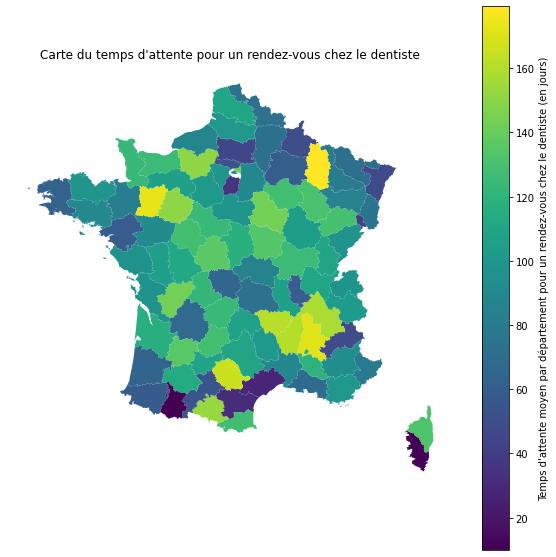

In [22]:
import matplotlib.pyplot as plt
communes_att2['dep'] = communes.insee.str[:2]


fig,ax = plt.subplots(figsize=(10, 10))

communes_att2[communes_att2.dep != "97"].dissolve(by='dep', aggfunc='mean').plot(ax = ax, column = "Dentiste",legend=True,legend_kwds={'label': "Temps d'attente moyen par département pour un rendez-vous chez le dentiste (en jours)"})
ax.set_axis_off()
ax.set_title("Carte du temps d'attente pour un rendez-vous chez le dentiste")

ax

#### Visualisation avec le temps d'attente moyen (généralistes et spécialistes) par département

#### On créer un dataframe avec le temps d'attente moyen :

In [24]:
communes_att2['att_moyenne_2'] = communes_att2[['Dentist', 'Dermatologist','GP','Gynécologist','Ophtalmologist','Pédiatrician']].mean(axis=1)


<AxesSubplot:title={'center':"Carte du temps d'attente pour un rendez-vous chez un médecin"}>

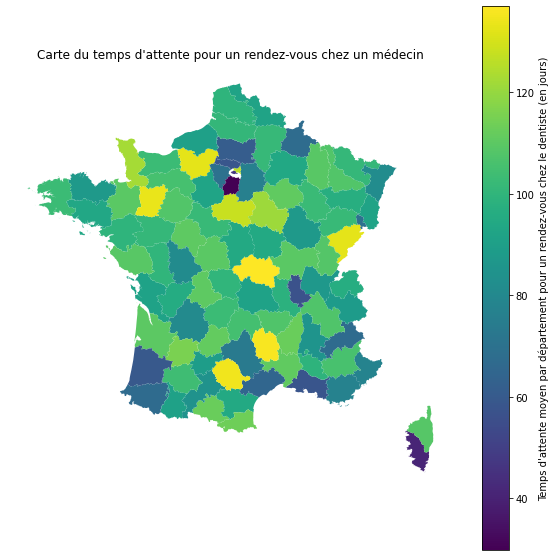

In [25]:
fig,ax = plt.subplots(figsize=(10, 10))

communes_att2[communes_att2.dep != "97"].dissolve(by='dep', aggfunc='mean').plot(ax = ax, column = "att_moyenne_2",legend=True,legend_kwds={'label': "Temps d'attente moyen par département pour un rendez-vous chez le dentiste (en jours)"})
ax.set_axis_off()
ax.set_title("Carte du temps d'attente pour un rendez-vous chez un médecin")

ax

#### Observation et conclusion:

Il ne semble pas que le temps d'attente soit réellement déterminé géographiquement. Cependant, les choses suivantes sont à noter. Comme prévu, le bassin parisien est bien desservi. On ne peut pas vraiment noter une fracture nord-sud, cependant les littoraux (sud-est par exemple) semblent disposer de temps d'attente plus faibles que le centre de la France.


## 4. Modélisation

Dans cette section, nous nous restreignons par soucis de simplification à l'analyse du **temps d'attente chez le généraliste**.

### 4.1 RÉGRESSION 


#### Importation des données

In [ ]:
import pandas as pd
waiting = pd.read_csv("data/donnees concatenees.csv")

#### Régression linéaire simple

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols(
    'GP ~ density + attractiveness_rank',
    data = waiting
).fit()
results.summary()

# plutôt mauvais modèle
# R^2 de 0,18
# Statistiques de Fisher de p-valeur 5,70%
# (~ 1 chance sur 20 que ce résultat advienne sous hypothèse
# que tous les coefficients soient nuls)

# 17 jours d'attente en moyenne
# 0,0019 jours de plus par hab/m^2 (non significatif)
# 0,0026 jours de plus par rang en moins dans
# le classement des villes où il fait bon vivre

In [ ]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

# Region 220 (Paris) completely distorts the regression
# dataset.loc[220]

In [ ]:
results = smf.ols(
    'GP ~ density + attractiveness_rank',
    data = waiting[ waiting["City"] != "Paris" ]
).fit()
results.summary()

In [ ]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

# Many regions are outside the Cook region and
# thus have a quite high leverage on the results...

### Régression linéaire généralisée

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

dataset = pd.read_csv("data/donnees concatenees.csv")

results = smf.glm(
    'GP ~ density + attractiveness_rank',
    data=waiting[ waiting["City"] != "Paris" ],
    family=sm.families.Gamma()
).fit()

results.summary()

# pas d'amélioration avec un lien "exponentiel"

### Récupération des résidus

In [ ]:
results.resid

### 4.2 Carte des résidus

## 5. Démarche scientifique et reproductibilité

## 6. Format du code

Le rapport est accessible [sur Deepnote](https://deepnote.com/project/desert-medical-L4EiMo7RTomPSFl-EAWGNw/%2Freport.ipynb), où il est exécutable. La totalité du code et des données sont par ailleurs disponibles [sur Github](https://github.com/katossky/desert-medical). L'historique des enregistrements (_commits_) est disponible [ici](https://github.com/katossky/desert-medical/commits/main). Il n'y a pas eu lieu, vu la simplicité relative du projet, d'avoir recours à des branches de développement.

La plupart du code a été reporté en annexe, mais le rapport contient un exemple filé exécutable pour la ville de Poitiers. Le code est abondamment commenté et nous avons porté un soin particulier au choix des noms de variables afin d'en faciliter la lecture.

## 7. Pistes d'amélioration

- Étendre la modélisation à l'ensemble des temps d'attentes, séparément dans un premier temps, puis conjointement.

- La visualisation sur la carte considère, un peu grossièrement, le temps d'attente d'un département comme étant égal au temps d'attente moyen de certaines de ses communes. Il pourrait être interessant d'étudier les différences de temps d'attente à l'intérieur d'un même département. Cependant, l'obtention des données nécessiterait un travail très conséquent. En effet il faudrait reproduire la méthodologie de l'enquête de Marianne mais avec de nouvelles petites communes.

- Au moment de la carotgraphie des résidus, on perd une grande partie des donneés: soit parce que les communes ont des variables non renseignées, soit parce que la jointure avec les données géographiques est imparfaite (on utilise pour l'instant le nom de commune). Il vaudrait mieux représenter l'ensmeble de tourtes les préfectures et sous-préfectures et dex'pliciter (par la couleur grise par exemple) que la donnée est manquante.

- La fonction de mise à l'échelle des résidus n'envoie pas nécessairement 0 sur 0,5. C'est unprobl`eme car les résidus sont centrés par construction et l'opposition résidu positif vs. négatif a un sens. Nous souhaiterions que le 0 des résidus (i.e le 0,5 arpès mise à l'échelle) représente une commune suivant parfaitement la droite de régression, et représenté en blanc sur la carte. Ce n'est pas le cas à cette date.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f812232-8ed1-4e89-8f48-597e10058637' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>